In [1]:
#Import the required packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
StackingClassifier
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Reading the file
data = pd.read_csv('bankchurn.csv')
print(data.shape)
data.head()

(10000, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
# Check for Null values
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

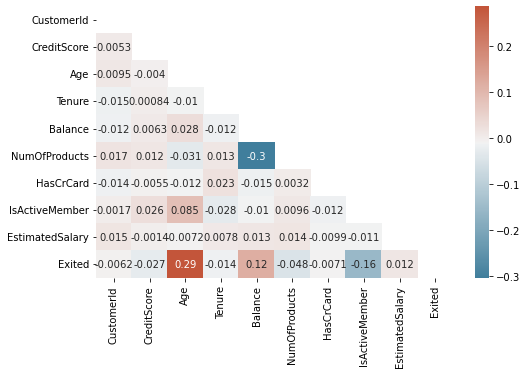

In [5]:
# Heatmap plot
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 5))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,annot = True)
plt.show()

In [6]:
data.Geography.unique()

array(['France', 'Spain', 'espanio', 'fra', 'Germany', 'france', 'ger',
       'spain', 'germany', 'gernamy', 'GERMANY'], dtype=object)

In [7]:
data.replace(['espanio', 'spain'], 'Spain', inplace = True)
data.replace(['fra', 'france'], 'France', inplace = True)
data.replace(['germany', 'ger', 'gernamy', 'GERMANY'], 'Germany', inplace = True)
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
def myOutliers(df,col):
    Q3 = np.quantile(df[col],0.75)
    Q1 = np.quantile(df[col],0.25)
    
    IQR = Q3 - Q1
    
    global mylist
    global my_outlier_df
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist = [x for x in df[col] if ((x < lower_range) | (x > upper_range))]
    print('total outliers in',col,'are',len(mylist))
    
    
    my_outlier_df = df.loc[df[col].isin(mylist)]
    return my_outlier_df

In [9]:
numeric_columns = ['CreditScore','Age','Balance','EstimatedSalary']

for i in numeric_columns:
    myOutliers(data,i)
    print('**************************************')

the lower range of CreditScore is 383.0
the upper range of CreditScore is 919.0
total outliers in CreditScore are 15
**************************************
the lower range of Age is 14.0
the upper range of Age is 62.0
total outliers in Age are 359
**************************************
the lower range of Balance is -191466.36000000002
the upper range of Balance is 319110.60000000003
total outliers in Balance are 0
**************************************
the lower range of EstimatedSalary is -96577.09624999999
the upper range of EstimatedSalary is 296967.45375
total outliers in EstimatedSalary are 0
**************************************


### UNIVARIATE ANALYSIS

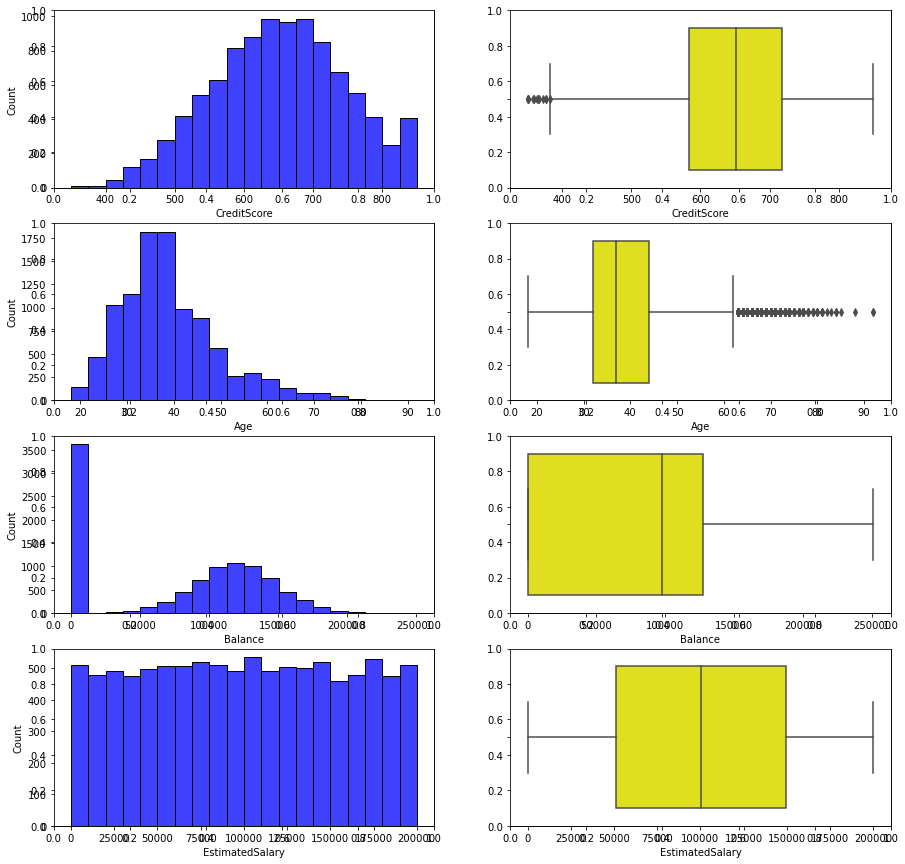

In [10]:
COLS = 2; POS = 1; ROWS = int(len(numeric_columns))
fig,ax = plt.subplots(ROWS,COLS,figsize=(15,15))
for i in numeric_columns:
    fig.add_subplot(ROWS,COLS,POS)  
    sns.histplot(data[i],bins=20,color='blue')
    POS+= 1  
    fig.add_subplot(ROWS,COLS,POS)  
    sns.boxplot(data[i],color='yellow')
    POS+= 1

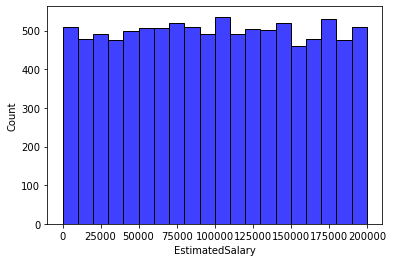

In [11]:
sns.histplot(data['EstimatedSalary'],bins=20,color='blue')

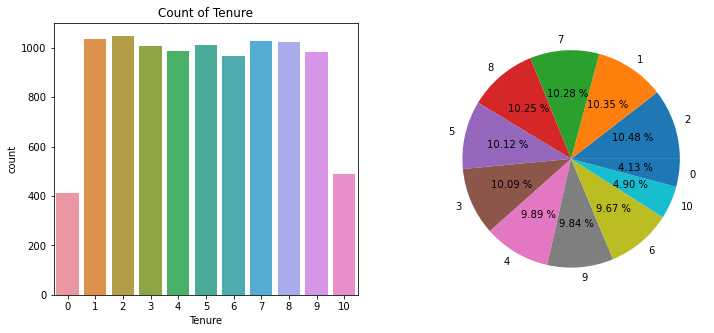

In [12]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of Tenure')
percentage = data['Tenure'].value_counts()
labels = list(data['Tenure'].value_counts().index)

sns.countplot(x = data['Tenure'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

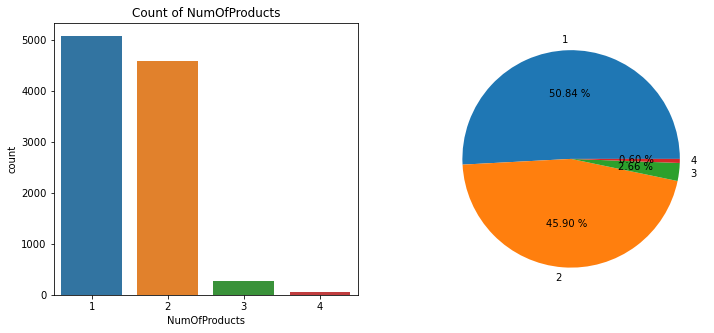

In [13]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of NumOfProducts')
percentage = data['NumOfProducts'].value_counts()
labels = list(data['NumOfProducts'].value_counts().index)

sns.countplot(x = data['NumOfProducts'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

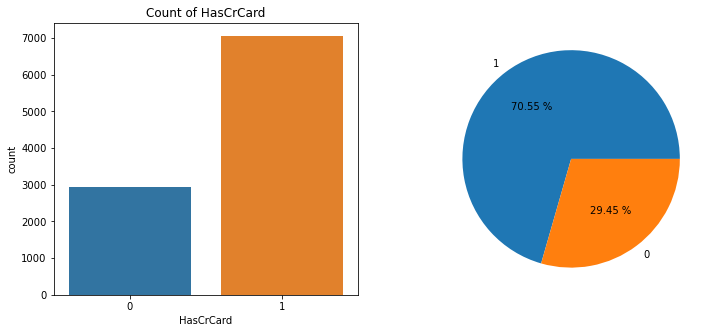

In [14]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of HasCrCard')
percentage = data['HasCrCard'].value_counts()
labels = list(data['HasCrCard'].value_counts().index)

sns.countplot(x = data['HasCrCard'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

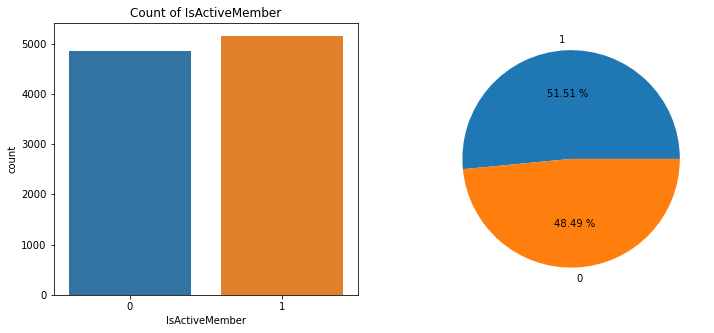

In [15]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of IsActiveMember')
percentage = data['IsActiveMember'].value_counts()
labels = list(data['IsActiveMember'].value_counts().index)

sns.countplot(x = data['IsActiveMember'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

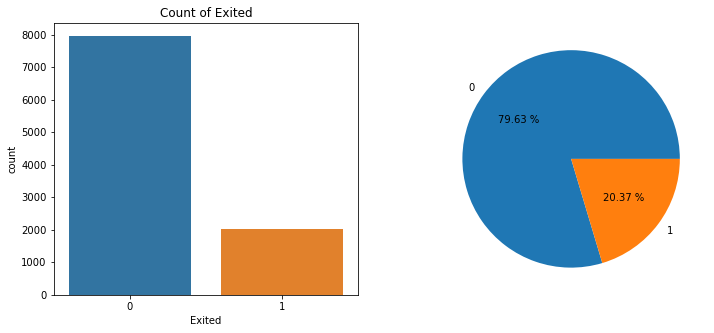

In [16]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of Exited')
percentage = data['Exited'].value_counts()
labels = list(data['Exited'].value_counts().index)

sns.countplot(x = data['Exited'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

### BIVARIATE ANALYSIS

In [17]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]
        
def annotate_pct(height=15,width=15,ax=ax):
    li = []
    for bar in ax.patches:
        li.append(bar.get_height())
    i,j = split_list(li,2)
    li1 = []
    li2 = []
    for x,y in zip(i,j):
        li1.append(f'{round(x/(x+y)*100,2)}%')
        li2.append(f'{round(y/(x+y)*100,2)}%')
    for i,bar in zip(li1 + li2,ax.patches):

        x = bar.get_x() + bar.get_width() /2
        y = bar.get_height()

        ax.annotate(i, (x,y),va = 'bottom',ha = 'center')
        fig.set_figheight(height)
        fig.set_figwidth(width)

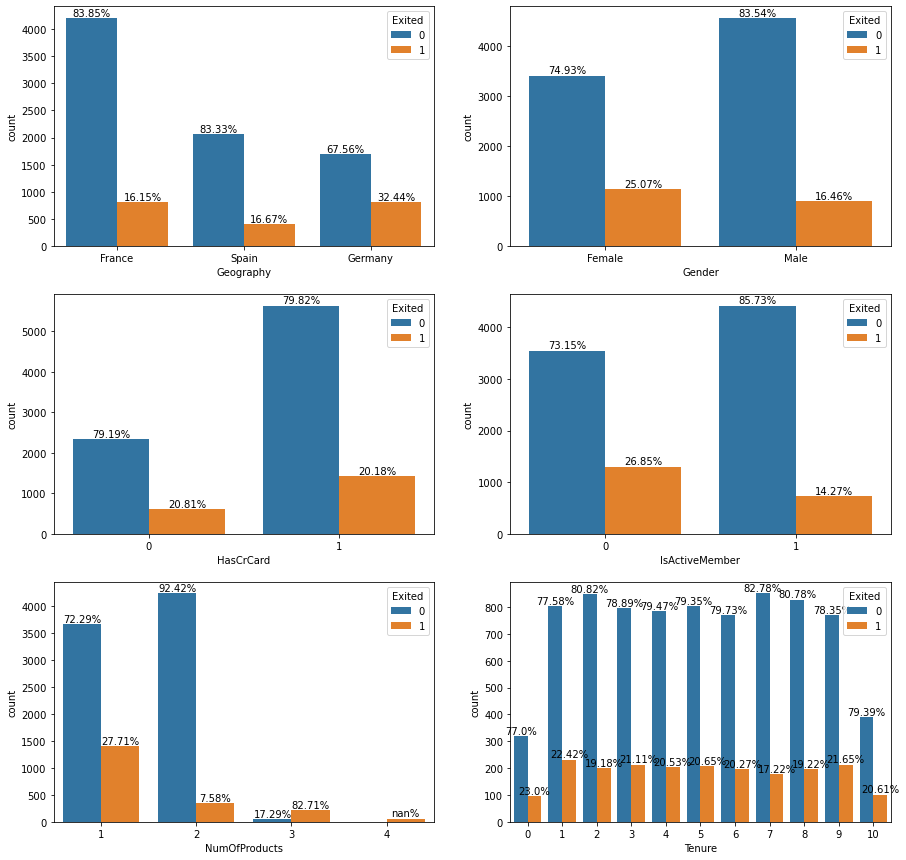

In [18]:
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=ax[0][0])
annotate_pct(ax = ax[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=ax[0][1])
annotate_pct(ax = ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=ax[1][0])
annotate_pct(ax = ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=ax[1][1])
annotate_pct(ax = ax[1][1])
sns.countplot(x='NumOfProducts', hue = 'Exited',data = data, ax=ax[2][0])
annotate_pct(ax = ax[2][0])
sns.countplot(x='Tenure', hue = 'Exited',data = data, ax=ax[2][1])
annotate_pct(ax = ax[2][1])
plt.show()

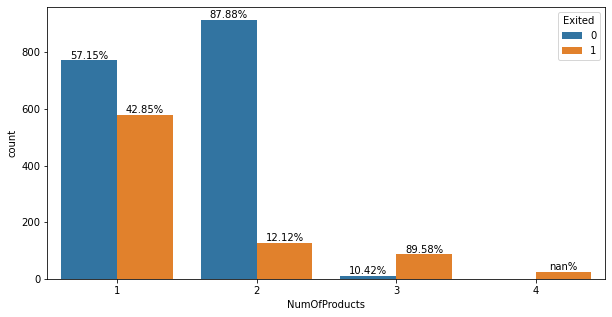

In [26]:
fig, ax = plt.subplots()

germany = data[data['Geography'] == 'Germany']

sns.countplot(x='NumOfProducts', hue = 'Exited',data = germany, ax=ax)
annotate_pct(height=5,width=10,ax = ax)

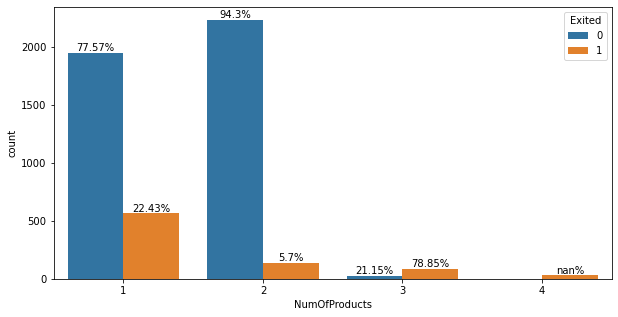

In [27]:
fig, ax = plt.subplots()

france = data[data['Geography'] == 'France']

sns.countplot(x='NumOfProducts', hue = 'Exited',data = france, ax=ax)
annotate_pct(height=5,width=10,ax = ax)

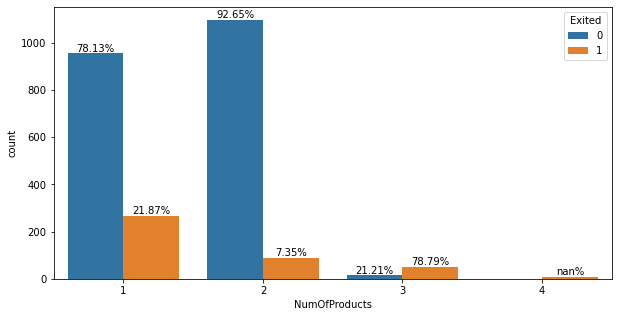

In [28]:
fig, ax = plt.subplots()

france = data[data['Geography'] == 'Spain']

sns.countplot(x='NumOfProducts', hue = 'Exited',data = france, ax=ax)
annotate_pct(height=5,width=10,ax = ax)

In [29]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
NP3 = data[data['NumOfProducts'] == 3]

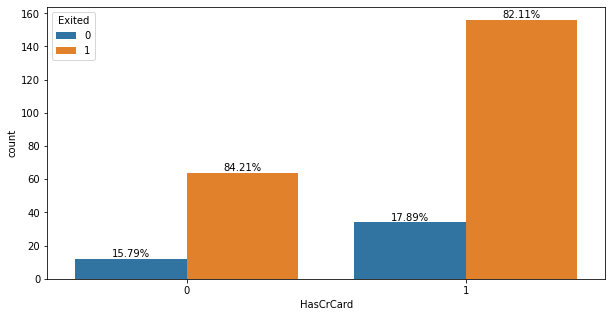

In [43]:
fig, ax = plt.subplots()

sns.countplot(x = 'HasCrCard',hue = 'Exited',data = NP3)
annotate_pct(height=5,width=10,ax = ax)

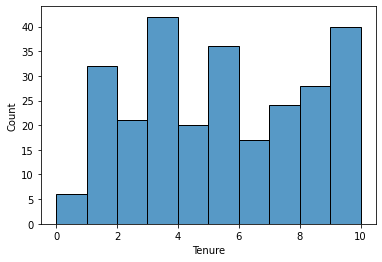

In [44]:
fig, ax = plt.subplots()

sns.histplot(x = 'Tenure',data = NP3)
# annotate_pct(height=5,width=10,ax = ax)

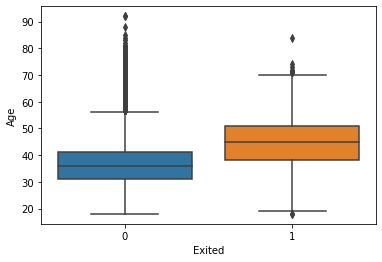

In [19]:
sns.boxplot(data['Exited'],data['Age'])
plt.show()

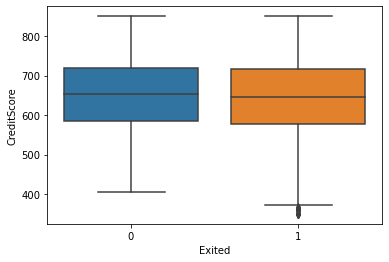

In [20]:
sns.boxplot(data['Exited'],data['CreditScore'])
plt.show()

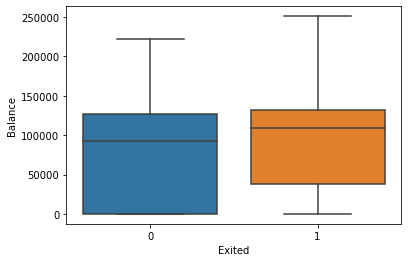

In [21]:
sns.boxplot(data['Exited'],data['Balance'])
plt.show()

In [22]:
data.drop(['CustomerId','Surname'],axis = 1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Creating dummies for all the categorical features

data['Geography'] = data.Geography.astype('category')
data['Gender'] = data.Gender.astype('category')

Geography_dummies = pd.get_dummies(data.Geography, prefix="Geography")
df_with_dummies = pd.concat([data,Geography_dummies],axis='columns')
df_with_dummies.drop('Geography',axis='columns',inplace=True)

Gender_dummies = pd.get_dummies(data.Gender, prefix="Gender")
df_with_dummies = pd.concat([df_with_dummies,Gender_dummies],axis='columns')
df_with_dummies.drop('Gender',axis='columns',inplace=True)

df_with_dummies.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


In [24]:
data1 = df_with_dummies.copy()

mm = preprocessing.MinMaxScaler()

data1[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = mm.fit_transform(data1[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

data1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


### Train Test Split

In [25]:
X_std = data1.drop('Exited',axis=1)
y = data1[['Exited']]

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_std, y, test_size=0.25, random_state=42)
print("X_train1={},X_test1={},y_train1={},y_test1={}".format(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape))

X_train1=(7500, 13),X_test1=(2500, 13),y_train1=(7500, 1),y_test1=(2500, 1)


### Feature Selection

In [85]:
from sklearn.feature_selection import RFE

In [91]:
def run_randomforest(X_train,X_test,y_train,y_test):
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    model.predict(X_test)

    y_predicted = model.predict(X_test)

    print('accuracy_score :',model.score(X_test,y_test))

In [98]:
for index in range(1,len(X_train1.columns)):
    sel = RFE(RandomForestClassifier(),n_features_to_select = index)
    sel.fit(X_train1,y_train1)
    X_train_rfe = sel.transform(X_train1)
    X_test_rfe = sel.transform(X_test1)
    print('Selected features :',index)
    run_randomforest(X_train_rfe,X_test_rfe,y_train1,y_test1)

Selected features : 1
accuracy_score : 0.6856
Selected features : 2
accuracy_score : 0.7616
Selected features : 3
accuracy_score : 0.794
Selected features : 4
accuracy_score : 0.8008
Selected features : 5
accuracy_score : 0.8376
Selected features : 6
accuracy_score : 0.8408
Selected features : 7
accuracy_score : 0.8584
Selected features : 8
accuracy_score : 0.8736
Selected features : 9
accuracy_score : 0.8664
Selected features : 10
accuracy_score : 0.8644
Selected features : 11
accuracy_score : 0.8716
Selected features : 12
accuracy_score : 0.8668


In [99]:
sel = RFE(RandomForestClassifier(),n_features_to_select = 8)
sel.fit(X_train1,y_train1)
X_train_rfe = sel.transform(X_train1)
X_test_rfe = sel.transform(X_test1)
run_randomforest(X_train_rfe,X_test_rfe,y_train1,y_test1)

features = X_train1.columns[sel.get_support()]
features

accuracy_score : 0.8716


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany'],
      dtype='object')

### Logistic Regression

In [137]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

# Using the trained model to predict the outcome of the X_Test dataset
y_pred = logreg.predict(X_test1)

#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train1, y_train1) * 100, 2)
acc_log

81.15

In [126]:
print(classification_report(y_test1,  y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.55      0.19      0.28       497

    accuracy                           0.81      2500
   macro avg       0.69      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500



In [138]:
MODEL = []
PRECISION_0 = []
PRECISION_1 = []
RECALL_0 = []
RECALL_1 = []
F1_SCORE_0 = []
F1_SCORE_1 = []
AUC = []

MODEL.append('Logistic Regression')
PRECISION_0.append(round(precision_score(y_test1, y_pred,pos_label=0),4))
PRECISION_1.append(round(precision_score(y_test1, y_pred,pos_label=1),4))
RECALL_0.append(round(recall_score(y_test1, y_pred,pos_label=0),4))
RECALL_1.append(round(recall_score(y_test1, y_pred,pos_label=1),4))
F1_SCORE_0.append(round(f1_score(y_test1, y_pred,pos_label=0),4))
F1_SCORE_1.append(round(f1_score(y_test1, y_pred,pos_label=1),4))

fpr, tpr, threshold = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])
area_under_curve = auc(fpr, tpr)
AUC.append(area_under_curve)

In [30]:
clf = LogisticRegression()

clf.fit(X_train1,y_train1)

cv = KFold(n_splits=5)
n_scores = cross_val_score(clf, X_std, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores1 = cross_val_score(clf, X_std, y, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')

y_pred = cross_val_predict(clf, X_test1,y_test1, n_jobs=-1)

print('Accuracy : %.3f' % (np.mean(n_scores)))
print('f1 macro : %.3f' % (np.mean(n_scores1)))

Accuracy : 0.810
f1 macro : 0.596


In [31]:
Cross_Val_Score = []

Cross_Val_Score.append(np.mean(n_scores))

### Decision tree classification

In [32]:
for i in range(1,len(X_train1.columns)+1):
# Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=i)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train1,y_train1)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test1)
    
    print('max_depth = ',i)
    print('accuracy = {}%'.format(round(clf.score(X_test1, y_test1) * 100, 2)))
    print('*'*50)

max_depth =  1
accuracy = 80.12%
**************************************************
max_depth =  2
accuracy = 84.64%
**************************************************
max_depth =  3
accuracy = 84.96%
**************************************************
max_depth =  4
accuracy = 85.48%
**************************************************
max_depth =  5
accuracy = 86.04%
**************************************************
max_depth =  6
accuracy = 86.4%
**************************************************
max_depth =  7
accuracy = 86.36%
**************************************************
max_depth =  8
accuracy = 85.24%
**************************************************
max_depth =  9
accuracy = 85.4%
**************************************************
max_depth =  10
accuracy = 83.92%
**************************************************
max_depth =  11
accuracy = 83.68%
**************************************************
max_depth =  12
accuracy = 83.36%
******************************************

In [139]:
dtc = DecisionTreeClassifier(max_depth=6)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred = dtc.predict(X_test1)

print('accuracy = {}%'.format(round(dtc.score(X_test1, y_test1) * 100, 2)))

accuracy = 86.32%


In [34]:
print(classification_report(y_test1,  y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.75      0.46      0.57       497

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [140]:
MODEL.append('Decision Tree Classifier')
PRECISION_0.append(round(precision_score(y_test1, y_pred,pos_label=0),4))
PRECISION_1.append(round(precision_score(y_test1, y_pred,pos_label=1),4))
RECALL_0.append(round(recall_score(y_test1, y_pred,pos_label=0),4))
RECALL_1.append(round(recall_score(y_test1, y_pred,pos_label=1),4))
F1_SCORE_0.append(round(f1_score(y_test1, y_pred,pos_label=0),4))
F1_SCORE_1.append(round(f1_score(y_test1, y_pred,pos_label=1),4))

fpr, tpr, threshold = roc_curve(y_test1, dtc.predict_proba(X_test1)[:,1])
area_under_curve = auc(fpr, tpr)
AUC.append(area_under_curve)

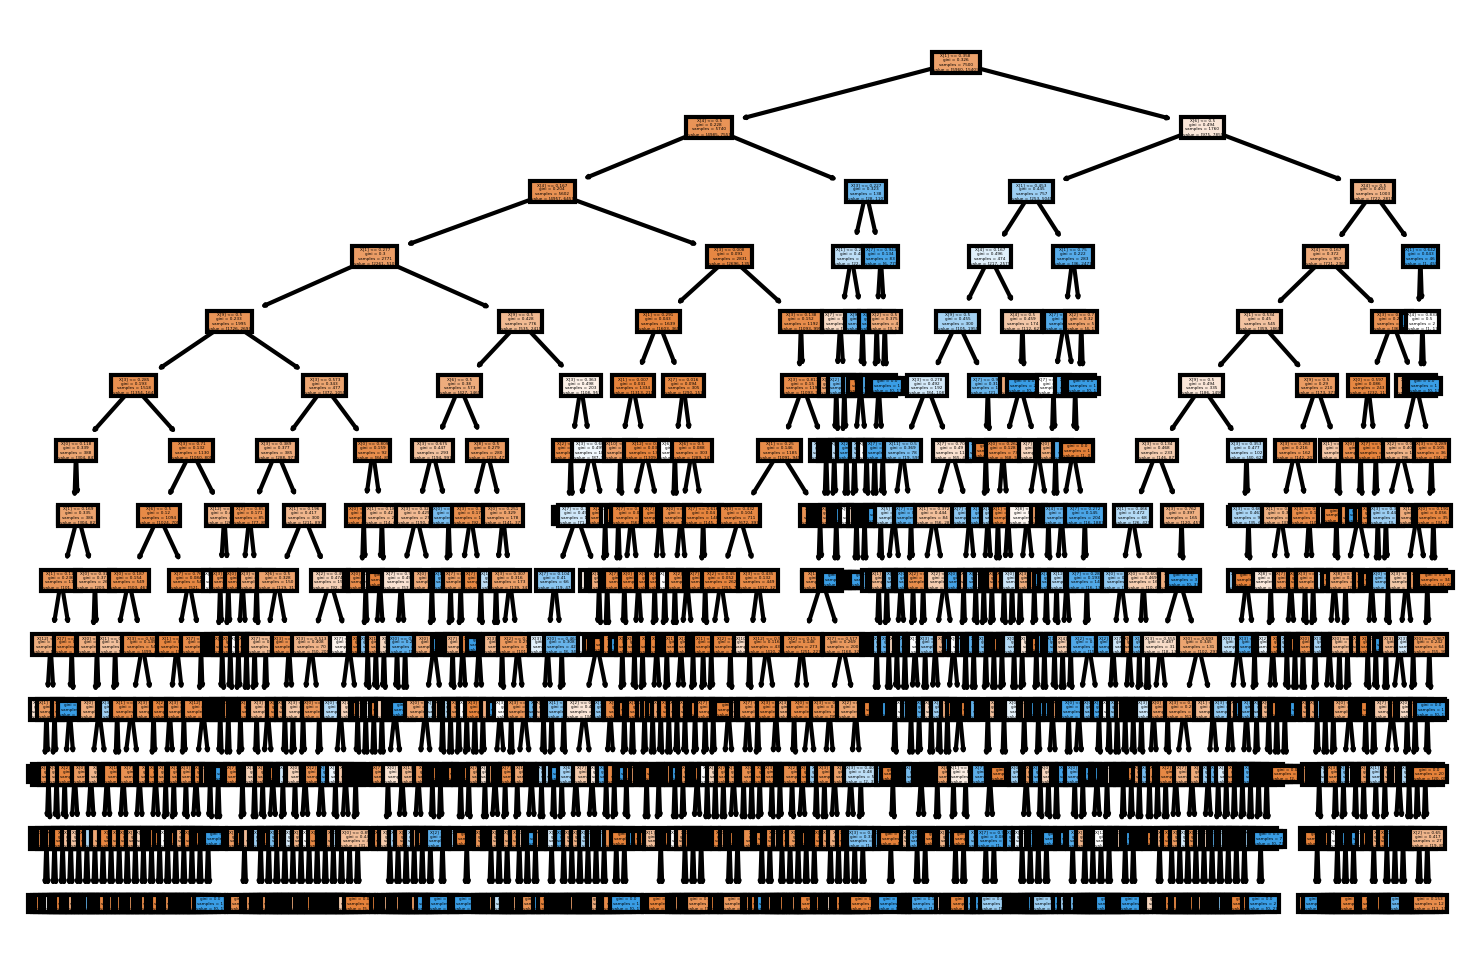

In [36]:
fig, axes = plt.subplots(dpi=300)

plot_tree(clf,filled = True);

In [37]:
kf = KFold(n_splits=5)
scores = []
MSE = []
for train_index, test_index in kf.split(X_std,y):
    X_train, X_test = X_std.iloc[train_index], X_std.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13]}
    clf = DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hyperparameters :(best parameters) ",clf_cv.best_params_)
    clf = DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print('Accuracy : ',s)
    scores.append(s)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
Accuracy :  0.8505
tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
Accuracy :  0.852
tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
Accuracy :  0.8545
tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
Accuracy :  0.872
tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
Accuracy :  0.854


In [38]:
print('Accuracy : %.3f' % (np.mean(scores)))

Accuracy : 0.857


In [39]:
Cross_Val_Score.append(np.mean(scores))

### Randomforestclassifier

In [40]:
for i in range(1,len(X_train1.columns)+1):
# Create RandomForestClassifier object
    clf = RandomForestClassifier(max_depth=i)

    # Train RandomForestClassifier
    clf = clf.fit(X_train1,y_train1)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test1)
    
    print('max_depth = ',i)
    print('accuracy = {}%'.format(round(clf.score(X_test1, y_test1) * 100, 2)))
    print('*'*50)

max_depth =  1
accuracy = 80.12%
**************************************************
max_depth =  2
accuracy = 81.2%
**************************************************
max_depth =  3
accuracy = 82.12%
**************************************************
max_depth =  4
accuracy = 83.8%
**************************************************
max_depth =  5
accuracy = 84.52%
**************************************************
max_depth =  6
accuracy = 85.88%
**************************************************
max_depth =  7
accuracy = 86.16%
**************************************************
max_depth =  8
accuracy = 86.2%
**************************************************
max_depth =  9
accuracy = 87.0%
**************************************************
max_depth =  10
accuracy = 86.52%
**************************************************
max_depth =  11
accuracy = 86.8%
**************************************************
max_depth =  12
accuracy = 86.64%
*********************************************

In [141]:
rfc = RandomForestClassifier(max_depth=9)

# Train RandomForestClassifier
rfc = rfc.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred = rfc.predict(X_test1)

print('accuracy = {}%'.format(round(rfc.score(X_test1, y_test1) * 100, 2)))

print(classification_report(y_test1,  y_pred))

accuracy = 86.76%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.81      0.44      0.57       497

    accuracy                           0.87      2500
   macro avg       0.84      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [142]:
MODEL.append('Random Forest Classifier')
PRECISION_0.append(round(precision_score(y_test1, y_pred,pos_label=0),4))
PRECISION_1.append(round(precision_score(y_test1, y_pred,pos_label=1),4))
RECALL_0.append(round(recall_score(y_test1, y_pred,pos_label=0),4))
RECALL_1.append(round(recall_score(y_test1, y_pred,pos_label=1),4))
F1_SCORE_0.append(round(f1_score(y_test1, y_pred,pos_label=0),4))
F1_SCORE_1.append(round(f1_score(y_test1, y_pred,pos_label=1),4))

fpr, tpr, threshold = roc_curve(y_test1, rfc.predict_proba(X_test1)[:,1])
area_under_curve = auc(fpr, tpr)
AUC.append(area_under_curve)

In [43]:
kf = KFold(n_splits=5)
scores = []

for train_index, test_index in kf.split(X_std,y):
    X_train, X_test = X_std.iloc[train_index], X_std.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13]}
    clf = RandomForestClassifier()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hyperparameters :(best parameters) ",clf_cv.best_params_)
    clf = RandomForestClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print('Accuracy : ',s)
    scores.append(s)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10}
Accuracy :  0.86
tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 9}
Accuracy :  0.866
tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10}
Accuracy :  0.858
tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10}
Accuracy :  0.8745
tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10}
Accuracy :  0.8595


In [44]:
print('Accuracy : %.3f' % (np.mean(scores)))

Accuracy : 0.864


In [45]:
Cross_Val_Score.append(np.mean(scores))

### AdaBoostClassifier

In [143]:
abc = AdaBoostClassifier()

abc.fit(X_train1, y_train1)
y_test_predicted = abc.predict(X_test1)

print('accuracy = {}%'.format(round(abc.score(X_test1, y_test1) * 100, 2)))

print(classification_report(y_test1,  y_test_predicted))

accuracy = 85.56%
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2003
           1       0.71      0.46      0.56       497

    accuracy                           0.86      2500
   macro avg       0.79      0.71      0.74      2500
weighted avg       0.84      0.86      0.84      2500



In [147]:
MODEL.append('AdaBoost Classifier')
PRECISION_0.append(round(precision_score(y_test1, y_test_predicted,pos_label=0),4))
PRECISION_1.append(round(precision_score(y_test1, y_test_predicted,pos_label=1),4))
RECALL_0.append(round(recall_score(y_test1, y_test_predicted,pos_label=0),4))
RECALL_1.append(round(recall_score(y_test1, y_test_predicted,pos_label=1),4))
F1_SCORE_0.append(round(f1_score(y_test1, y_test_predicted,pos_label=0),4))
F1_SCORE_1.append(round(f1_score(y_test1, y_test_predicted,pos_label=1),4))

fpr, tpr, threshold = roc_curve(y_test1, abc.predict_proba(X_test1)[:,1])
area_under_curve = auc(fpr, tpr)
AUC.append(area_under_curve)

In [54]:
clf = AdaBoostClassifier()

cv = KFold(n_splits=5)
n_scores = cross_val_score(clf, X_train1, y_train1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy : %.3f' % (np.mean(n_scores)))

Accuracy : 0.853


In [55]:
Cross_Val_Score.append(np.mean(n_scores))

### Stacking

In [56]:
def stacking():

    level0 = list()
    level0.append(('ada', AdaBoostClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('rfr', RandomForestClassifier()))

    level1 = LogisticRegression()

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [148]:
stc = stacking()

stc.fit(X_train1,y_train1)

y_pred = stc.predict(X_test1)

print('accuracy = {}%'.format(round(stc.score(X_test1, y_test1) * 100, 2)))

print(classification_report(y_test1,  y_pred))

accuracy = 86.96%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.48      0.60       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [149]:
MODEL.append('Stacking Classifier')
PRECISION_0.append(round(precision_score(y_test1, y_pred,pos_label=0),4))
PRECISION_1.append(round(precision_score(y_test1, y_pred,pos_label=1),4))
RECALL_0.append(round(recall_score(y_test1, y_pred,pos_label=0),4))
RECALL_1.append(round(recall_score(y_test1, y_pred,pos_label=1),4))
F1_SCORE_0.append(round(f1_score(y_test1, y_pred,pos_label=0),4))
F1_SCORE_1.append(round(f1_score(y_test1, y_pred,pos_label=1),4))

fpr, tpr, threshold = roc_curve(y_test1, stc.predict_proba(X_test1)[:,1])
area_under_curve = auc(fpr, tpr)
AUC.append(area_under_curve)

In [59]:
model = stacking()

cv = KFold(n_splits=5)
n_scores = cross_val_score(model, X_std, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy Score: %.3f' % (np.mean(n_scores)))

Accuracy Score: 0.861


In [60]:
Cross_Val_Score.append(np.mean(n_scores))

### Naive Bayes Classifier

In [150]:
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)

y_pred = gnb.predict(X_test1)
print('accuracy = {}%'.format(round(gnb.score(X_test1, y_test1) * 100, 2)))

print(classification_report(y_test1,  y_pred))

accuracy = 81.52%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2003
           1       0.55      0.38      0.45       497

    accuracy                           0.82      2500
   macro avg       0.70      0.65      0.67      2500
weighted avg       0.80      0.82      0.80      2500



In [151]:
MODEL.append('GaussianNB Classifier')
PRECISION_0.append(round(precision_score(y_test1, y_pred,pos_label=0),4))
PRECISION_1.append(round(precision_score(y_test1, y_pred,pos_label=1),4))
RECALL_0.append(round(recall_score(y_test1, y_pred,pos_label=0),4))
RECALL_1.append(round(recall_score(y_test1, y_pred,pos_label=1),4))
F1_SCORE_0.append(round(f1_score(y_test1, y_pred,pos_label=0),4))
F1_SCORE_1.append(round(f1_score(y_test1, y_pred,pos_label=1),4))

fpr, tpr, threshold = roc_curve(y_test1, gnb.predict_proba(X_test1)[:,1])
area_under_curve = auc(fpr, tpr)
AUC.append(area_under_curve)

In [63]:
clf = GaussianNB()

cv = KFold(n_splits=5)
n_scores = cross_val_score(clf, X_train1, y_train1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy : %.3f' % (np.mean(n_scores)))

Accuracy : 0.813


In [64]:
Cross_Val_Score.append(np.mean(n_scores))

### Deep Learning model 1 (2 hidden layers)

In [65]:
def CompileModel_classification(units,shape): 
    # define the network
    model = tf.keras.Sequential([
                        Dense(units,activation='relu',input_shape=[shape]),  # HL1
                        Dense(units,activation='relu'), # HL2,
                        Dense(1,activation='sigmoid') # Output Layer
                        ])
    
    # compile the network
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return(model)


def fitModel_classification(model,trainx,trainy,epoch,valsplit=0.2):
    errors = model.fit(trainx,trainy,epochs=epoch,validation_split=valsplit)
    
    errHistory = pd.DataFrame(errors.history)
    return(errHistory)

In [66]:
# Define parameter variables
units = 15
inputshape = len(X_train1.columns)
EPOCHS = 200

#Compile model
dl1 = CompileModel_classification(units,inputshape)

# fit the model
fitModel_classification(dl1,X_train1,y_train1,EPOCHS)

Epoch 1/200
188/188 [==============================] - 6s 6ms/step - loss: 0.5093 - accuracy: 0.7945 - val_loss: 0.4764 - val_accuracy: 0.7953
Epoch 2/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4724 - accuracy: 0.7955 - val_loss: 0.4584 - val_accuracy: 0.7987
Epoch 3/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4597 - accuracy: 0.7982 - val_loss: 0.4479 - val_accuracy: 0.8067
Epoch 4/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4497 - accuracy: 0.8055 - val_loss: 0.4403 - val_accuracy: 0.8053
Epoch 5/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4426 - accuracy: 0.8098 - val_loss: 0.4322 - val_accuracy: 0.8147
Epoch 6/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4362 - accuracy: 0.8140 - val_loss: 0.4266 - val_accuracy: 0.8173
Epoch 7/200
188/188 [==============================] - 1s 5ms/step - loss: 0.4323 - accuracy: 0.8115 - val_loss: 0.4240 - val_accuracy: 0.8193

,loss,accuracy,val_loss,val_accuracy
0,0.509255,0.794500,0.476385,0.795333
1,0.472433,0.795500,0.458351,0.798667
2,0.459719,0.798167,0.447943,0.806667
3,0.449680,0.805500,0.440258,0.805333
4,0.442561,0.809833,0.432238,0.814667
...,...,...,...,...
195,0.318503,0.867333,0.355007,0.848000
196,0.318057,0.871000,0.356053,0.853333
197,0.317907,0.869167,0.358951,0.852667
198,0.319355,0.869167,0.354688,0.846667


In [67]:
dl1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 466
Trainable params: 466
Non-trainable params: 0
_________________________________________________________________


In [68]:
probas = dl1.predict(X_test1)

probas_list = [x[0] for x in probas]
df = pd.DataFrame({'Actual' : y_test1['Exited'], 'Predicted' : probas_list})
df.loc[df.Predicted <=  0.53, 'Predicted'] = int(0)
df.loc[df.Predicted >  0.53, 'Predicted'] = int(1)

df['Predicted'] = pd.to_numeric(df['Predicted'], downcast='integer')

df.head(10)

,Actual,Predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,1,0
6363,0,0
439,0,0


In [69]:
print(classification_report(df.Actual,  df.Predicted))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2003
           1       0.81      0.41      0.54       497

    accuracy                           0.86      2500
   macro avg       0.84      0.69      0.73      2500
weighted avg       0.86      0.86      0.84      2500



In [152]:
fpr, tpr, threshold = roc_curve(df.Actual,  dl1.predict(X_test1))
area_under_curve = auc(fpr, tpr)
print('AUC = ' + str(area_under_curve))

AUC = 0.854895724823228


In [155]:
MODEL.append('Deep Learning 1')
PRECISION_0.append(round(precision_score(df.Actual, df.Predicted,pos_label=0),4))
PRECISION_1.append(round(precision_score(df.Actual, df.Predicted,pos_label=1),4))
RECALL_0.append(round(recall_score(df.Actual, df.Predicted,pos_label=0),4))
RECALL_1.append(round(recall_score(df.Actual, df.Predicted,pos_label=1),4))
F1_SCORE_0.append(round(f1_score(df.Actual, df.Predicted,pos_label=0),4))
F1_SCORE_1.append(round(f1_score(df.Actual, df.Predicted,pos_label=1),4))

AUC.append(area_under_curve)

Cross_Val_Score.append('--')

Deep Learning model 2 (3 hidden layers)

In [72]:
def CompileModel_classification1(units,shape): 
    # define the network
    model = tf.keras.Sequential([
                        Dense(units,activation='relu',input_shape=[shape]),  # HL1
                        Dense(units,activation='relu'), # HL2,
                        Dense(units,activation='relu'), # HL3,
                        Dense(1,activation='sigmoid') # Output Layer
                        ])
    
    # compile the network
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return(model)

In [73]:
# Define parameter variables
units = 15
inputshape = len(X_train1.columns)
EPOCHS = 200

#Compile model
dl2 = CompileModel_classification1(units,inputshape)

# fit the model
fitModel_classification(dl2,X_train1,y_train1,EPOCHS)

Epoch 1/200
188/188 [==============================] - 2s 6ms/step - loss: 0.4896 - accuracy: 0.7945 - val_loss: 0.4663 - val_accuracy: 0.7953
Epoch 2/200
188/188 [==============================] - 1s 5ms/step - loss: 0.4653 - accuracy: 0.7952 - val_loss: 0.4564 - val_accuracy: 0.8007
Epoch 3/200
188/188 [==============================] - 1s 6ms/step - loss: 0.4537 - accuracy: 0.8002 - val_loss: 0.4442 - val_accuracy: 0.8060
Epoch 4/200
188/188 [==============================] - 1s 5ms/step - loss: 0.4462 - accuracy: 0.8058 - val_loss: 0.4344 - val_accuracy: 0.8167
Epoch 5/200
188/188 [==============================] - 1s 6ms/step - loss: 0.4400 - accuracy: 0.8083 - val_loss: 0.4304 - val_accuracy: 0.8160
Epoch 6/200
188/188 [==============================] - 1s 6ms/step - loss: 0.4356 - accuracy: 0.8107 - val_loss: 0.4245 - val_accuracy: 0.8160
Epoch 7/200
188/188 [==============================] - 1s 6ms/step - loss: 0.4301 - accuracy: 0.8112 - val_loss: 0.4208 - val_accuracy: 0.8133

,loss,accuracy,val_loss,val_accuracy
0,0.489637,0.794500,0.466272,0.795333
1,0.465338,0.795167,0.456423,0.800667
2,0.453670,0.800167,0.444205,0.806000
3,0.446206,0.805833,0.434437,0.816667
4,0.440032,0.808333,0.430368,0.816000
...,...,...,...,...
195,0.303626,0.877500,0.369862,0.847333
196,0.301264,0.876833,0.373308,0.848000
197,0.302280,0.876333,0.375505,0.848667
198,0.303550,0.876000,0.370410,0.851333


In [74]:
dl2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 706
Trainable params: 706
Non-trainable params: 0
_________________________________________________________________


In [75]:
probas = dl2.predict(X_test1)

probas_list = [x[0] for x in probas]
df1 = pd.DataFrame({'Actual' : y_test1['Exited'], 'Predicted' : probas_list})
df1.loc[df1.Predicted <=  0.5, 'Predicted'] = int(0)
df1.loc[df1.Predicted >  0.5, 'Predicted'] = int(1)

df1['Predicted'] = pd.to_numeric(df1['Predicted'], downcast='integer')

df1.head(10)

,Actual,Predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,1,0
6363,0,0
439,0,0


In [76]:
print(classification_report(df1.Actual,  df1.Predicted))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.76      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [156]:
fpr, tpr, threshold = roc_curve(df1.Actual,  dl2.predict(X_test1))
area_under_curve = auc(fpr, tpr)
print('AUC = ' + str(area_under_curve))

AUC = 0.8487269096355468


In [157]:
MODEL.append('Deep Learning 2')
PRECISION_0.append(round(precision_score(df1.Actual, df1.Predicted,pos_label=0),4))
PRECISION_1.append(round(precision_score(df1.Actual, df1.Predicted,pos_label=1),4))
RECALL_0.append(round(recall_score(df1.Actual, df1.Predicted,pos_label=0),4))
RECALL_1.append(round(recall_score(df1.Actual, df1.Predicted,pos_label=1),4))
F1_SCORE_0.append(round(f1_score(df1.Actual, df1.Predicted,pos_label=0),4))
F1_SCORE_1.append(round(f1_score(df1.Actual, df1.Predicted,pos_label=1),4))

AUC.append(area_under_curve)

Cross_Val_Score.append('--')

### Comparision of Models

In [164]:
pd.DataFrame({'Model' : MODEL, 'PRECISION [0]' : PRECISION_0, 'PRECISION [1]' : PRECISION_1,
              'RECALL [0]' : RECALL_0, 'RECALL [1]' : RECALL_1,
              'F1_SCORE [0]' : F1_SCORE_0, 'F1_SCORE [1]' : F1_SCORE_1,
              'AUC' : AUC, 'CROSS VAL SCORE' : Cross_Val_Score})

,Model,PRECISION [0],PRECISION [1],RECALL [0],RECALL [1],F1_SCORE [0],F1_SCORE [1],AUC,CROSS VAL SCORE
0,Logistic Regression,0.8270,0.5529,0.9621,0.1891,0.8895,0.2819,0.773366,0.8103
1,Decision Tree Classifier,0.8787,0.7524,0.9621,0.4648,0.9185,0.5746,0.832984,0.8566
2,Random Forest Classifier,0.8752,0.8051,0.9735,0.4406,0.9218,0.5696,0.865835,0.8636
3,AdaBoost Classifier,0.8773,0.7099,0.9531,0.4628,0.9136,0.5603,0.849224,0.8528
4,Stacking Classifier,0.8827,0.7767,0.9656,0.4829,0.9223,0.5955,0.856343,0.8611
5,GaussianNB Classifier,0.8565,0.5516,0.9241,0.3763,0.8890,0.4474,0.788914,0.8132
6,Deep Learning 1,0.8690,0.8145,0.9770,0.4064,0.9199,0.5423,0.854896,--
7,Deep Learning 2,0.8797,0.7639,0.9641,0.4688,0.9200,0.5810,0.848727,--


### Best model is Stacking because it has the highest precision and recall score

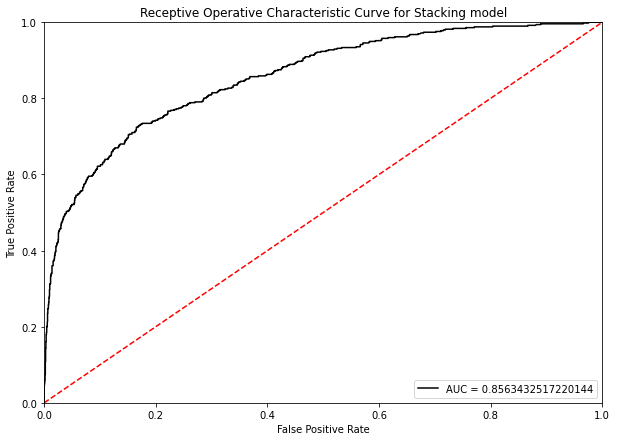

In [80]:
fpr, tpr, threshold = roc_curve(y_test1,  stc.predict_proba(X_test1)[:,1])
area_under_curve = auc(fpr, tpr)

plt.figure(figsize = (10,7))
plt.title('Receptive Operative Characteristic Curve for Stacking model')
plt.plot(fpr,tpr,'b',label = 'AUC = ' + str(area_under_curve), c = 'k')
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r',linestyle='dashed')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [81]:
y_test = [x[0] for x in np.array(y_test1)]
pd.DataFrame({'Actual' : y_test, 'Predicted' : stc.predict(X_test1) ,
             'Probability of churn' : stc.predict_proba(X_test1)[:,1]})

,Actual,Predicted,Probability of churn
0,0,0,0.054650
1,0,0,0.057229
2,0,0,0.127344
3,0,0,0.099907
4,0,0,0.097794
...,...,...,...
2495,0,0,0.143975
2496,1,1,0.910053
2497,0,0,0.074642
2498,0,0,0.080071


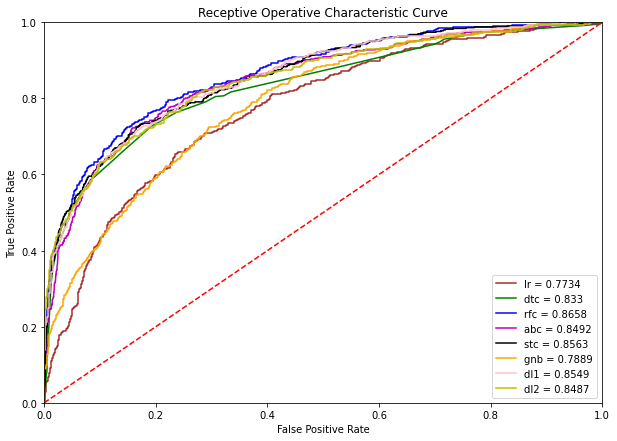

In [110]:
fpr_logreg, tpr_logreg, threshold = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])
fpr_dtc, tpr_dtc, threshold = roc_curve(y_test1, dtc.predict_proba(X_test1)[:,1])
fpr_rfc, tpr_rfc, threshold = roc_curve(y_test1, rfc.predict_proba(X_test1)[:,1])
fpr_abc, tpr_abc, threshold = roc_curve(y_test1, abc.predict_proba(X_test1)[:,1])
fpr_stc, tpr_stc, threshold = roc_curve(y_test1, stc.predict_proba(X_test1)[:,1])
fpr_gnb, tpr_gnb, threshold = roc_curve(y_test1, gnb.predict_proba(X_test1)[:,1])
fpr_dl1, tpr_dl1, threshold = roc_curve(y_test1, dl1.predict(X_test1))
fpr_dl2, tpr_dl2, threshold = roc_curve(y_test1, dl2.predict(X_test1))

area_under_curve_logreg = auc(fpr_logreg, tpr_logreg)
area_under_curve_dtc = auc(fpr_dtc, tpr_dtc)
area_under_curve_rfc = auc(fpr_rfc, tpr_rfc)
area_under_curve_abc = auc(fpr_abc, tpr_abc)
area_under_curve_stc = auc(fpr_stc, tpr_stc)
area_under_curve_gnb = auc(fpr_gnb, tpr_gnb)
area_under_curve_dl1 = auc(fpr_dl1, tpr_dl1)
area_under_curve_dl2 = auc(fpr_dl2, tpr_dl2)

plt.figure(figsize = (10,7))
plt.title('Receptive Operative Characteristic Curve')
plt.plot(fpr_logreg, tpr_logreg,'b',label = 'lr = ' + str(round(area_under_curve_logreg,4)), c = 'brown')
plt.plot(fpr_dtc, tpr_dtc,'b',label = 'dtc = ' + str(round(area_under_curve_dtc,4)), c = 'g')
plt.plot(fpr_rfc, tpr_rfc,'b',label = 'rfc = ' + str(round(area_under_curve_rfc,4)), c = 'b')
plt.plot(fpr_abc, tpr_abc,'b',label = 'abc = ' + str(round(area_under_curve_abc,4)), c = 'm')
plt.plot(fpr_stc, tpr_stc,'b',label = 'stc = ' + str(round(area_under_curve_stc,4)), c = 'k')
plt.plot(fpr_gnb, tpr_gnb,'b',label = 'gnb = ' + str(round(area_under_curve_gnb,4)), c = 'orange')
plt.plot(fpr_dl1, tpr_dl1,'b',label = 'dl1 = ' + str(round(area_under_curve_dl1,4)), c = 'pink')
plt.plot(fpr_dl2, tpr_dl2,'b',label = 'dl2 = ' + str(round(area_under_curve_dl2,4)), c = 'y')
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r',linestyle='dashed')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()